In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import numpy as np

## Data Exploration

In [2]:
dataset = pd.read_csv('./dataset.csv')
dataset.head()

,Unnamed: 0,community_area,primary_type,Description,Arrest,Domestic,location_description,Date,Comm_Area,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,0,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2015-09-24T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,1,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2014-09-07T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,2,30,OFFENSE AND KIDNAPPING,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,True,RESIDENCE,2015-06-18T00:00:00.000000,South Lawndale,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,3,46,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,APARTMENT,2013-08-27T00:00:00.000000,South Chicago,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,4,16,THEFT,OVER $500,False,False,RESIDENCE,2017-07-14T00:30:00.000000,Irving Park,32.3,3.5,10.3,5.8,10.3,30.2,31043.0


In [3]:
dataset.dtypes

Unnamed: 0                          int64
community_area                      int64
primary_type                       object
Description                        object
Arrest                               bool
Domestic                             bool
location_description               object
Date                               object
Comm_Area                          object
Hardship_Score                    float64
Crowded_Housing_Per               float64
Below_Poverty_Household_Income    float64
Unemployment_Rate                 float64
No_High_School_Diploma            float64
Under_18_over_64                  float64
Per_Capita_Income                 float64
dtype: object

In [4]:
dataset.describe() 

,Unnamed: 0,community_area,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
count,1.045251e+06,1.045251e+06,1.045251e+06,1.045251e+06,1.045251e+06,1.045251e+06,1.045251e+06,1.045251e+06,1.045251e+06
mean,5.226250e+05,3.699696e+01,4.362114e+01,4.158709e+00,2.312322e+01,1.366700e+01,1.083967e+01,3.404307e+01,3.066696e+04
std,3.017381e+05,2.165766e+01,1.821669e+01,2.696893e+00,1.029274e+01,8.191263e+00,6.004282e+00,7.526130e+00,2.150851e+04
min,0.000000e+00,1.000000e+00,8.600000e+00,3.000000e-01,4.300000e+00,2.900000e+00,1.400000e+00,1.670000e+01,9.601000e+03
25%,2.613125e+05,2.200000e+01,2.890000e+01,2.200000e+00,1.300000e+01,6.600000e+00,7.300000e+00,2.620000e+01,1.671900e+04
50%,5.226250e+05,3.200000e+01,5.040000e+01,3.300000e+00,2.330000e+01,1.210000e+01,9.700000e+00,3.750000e+01,2.006700e+04
75%,7.839375e+05,5.600000e+01,5.590000e+01,4.700000e+00,3.010000e+01,1.990000e+01,1.420000e+01,3.890000e+01,3.874800e+04
max,1.045250e+06,7.700000e+01,8.420000e+01,1.360000e+01,5.880000e+01,3.560000e+01,2.880000e+01,4.760000e+01,9.194800e+04


In [5]:
report = sv.analyze(dataset)

# Display the report
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Preparation

In [6]:
dataset.loc[dataset['primary_type']=='OFFENSE INVOLVING CHILDREN', 'primary_type'] = 'OFFENSE AND KIDNAPPING'
dataset.loc[dataset['primary_type']=='OTHER OFFENSE', 'primary_type'] = 'OFFENSE AND KIDNAPPING'
dataset.loc[dataset['primary_type']=='KIDNAPPING', 'primary_type'] = 'OFFENSE AND KIDNAPPING'

dataset.loc[dataset['primary_type']=='GAMBLING', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='PUBLIC PEACE VIOLATION', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='LIQUOR LAW VIOLATION', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='CRIMINAL TRESPASS', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='CONCEALED CARRY LICENSE VIOLATION', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='STALKING', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='OBSCENITY', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='ARSON', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='DECEPTIVE PRACTICE', 'primary_type'] = 'PUBLIC ORDER CRIMES'
dataset.loc[dataset['primary_type']=='INTERFERENCE WITH PUBLIC OFFICER', 'primary_type'] = 'PUBLIC ORDER CRIMES'

dataset.loc[dataset['primary_type']=='CRIMINAL SEXUAL ASSAULT', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='SEX OFFENSE', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='CRIM SEXUAL ASSAULT', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='PROSTITUTION', 'primary_type'] = 'SEXUAL ASSAULT'
dataset.loc[dataset['primary_type']=='HUMAN TRAFFICKING', 'primary_type'] = 'SEXUAL ASSAULT'

dataset.loc[dataset['primary_type']=='THEFT', 'primary_type'] = 'THEFT'
dataset.loc[dataset['primary_type']=='MOTOR VEHICLE THEFT', 'primary_type'] = 'THEFT'
dataset.loc[dataset['primary_type']=='BURGLARY', 'primary_type'] = 'THEFT'
dataset.loc[dataset['primary_type']=='ROBBERY', 'primary_type'] = 'THEFT'

dataset.loc[dataset['primary_type']=='BATTERY', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='HOMICIDE', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='INTIMIDATION', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='WEAPONS VIOLATION', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='CRIMINAL DAMAGE', 'primary_type'] = 'ASSAULT'
dataset.loc[dataset['primary_type']=='ASSAULT', 'primary_type'] = 'ASSAULT'

dataset.loc[dataset['primary_type']=='OTHER NARCOTIC VIOLATION', 'primary_type'] = 'DRUGS'
dataset.loc[dataset['primary_type']=='NARCOTICS', 'primary_type'] = 'DRUGS'

dataset.loc[dataset['primary_type']=='NON-CRIMINAL (SUBJECT SPECIFIED)', 'primary_type'] = 'NON-CRIMINAL'
dataset.loc[dataset['primary_type']=='NON - CRIMINAL', 'primary_type'] = 'DRUGS'
dataset.loc[dataset['primary_type']=='NON-CRIMINAL', 'primary_type'] = 'DRUGS'

dataset.head()

,Unnamed: 0,community_area,primary_type,Description,Arrest,Domestic,location_description,Date,Comm_Area,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,0,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2015-09-24T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,1,63,OFFENSE AND KIDNAPPING,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,False,True,APARTMENT,2014-09-07T00:00:00.000000,Gage Park,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,2,30,OFFENSE AND KIDNAPPING,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,True,RESIDENCE,2015-06-18T00:00:00.000000,South Lawndale,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,3,46,PUBLIC ORDER CRIMES,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,APARTMENT,2013-08-27T00:00:00.000000,South Chicago,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,4,16,THEFT,OVER $500,False,False,RESIDENCE,2017-07-14T00:30:00.000000,Irving Park,32.3,3.5,10.3,5.8,10.3,30.2,31043.0


In [7]:
dataset.drop(['Unnamed: 0',"Description","Comm_Area"], axis=1, inplace=True)

In [8]:
category_mapping = {

    'Residential Areas': ['APARTMENT', 'RESIDENCE', 'RESIDENCE - YARD (FRONT / BACK)', 'RESIDENCE - PORCH / HALLWAY', 'RESIDENTIAL YARD (FRONT/BACK)', 'HOUSE', 'GARAGE', 'GANGWAY', 'PORCH', 'YARD', 'ROOMING HOUSE', 'RESIDENCE-GARAGE', 'CHA APARTMENT','HOTEL/MOTEL',"RESIDENCE - GARAGE"],

    'Commercial Areas': ['COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'TAVERN / LIQUOR STORE', 'RESTAURANT', 'SMALL RETAIL STORE', 'BANK', 'GROCERY FOOD STORE', 'DRUG STORE', 'DEPARTMENT STORE', 'CONVENIENCE STORE', 'BARBERSHOP', 'RETAIL STORE', 'BARBER SHOP/BEAUTY SALON', 'CLUB', 'LIQUOR STORE', 'CLEANERS/LAUNDROMAT', 'CLEANING STORE', 'COIN OPERATED MACHINE', 'PAWN SHOP', 'NEWSSTAND', 'BOWLING ALLEY'],

    'Public Spaces': ['PARK PROPERTY', 'PARK', 'PARK PROPERTY', 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'AIRPORT PARKING LOT', 'AIRPORT VENDING ESTABLISHMENT', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'CEMETERY'],

    'Transportation': ['CTA TRAIN', 'CTA BUS', 'CTA BUS STOP', 'CTA PLATFORM', 'CTA TRACKS - RIGHT OF WAY', 'CTA STATION', 'CTA PARKING LOT / GARAGE / OTHER PROPERTY', 'CTA PROPERTY', 'VEHICLE NON-COMMERCIAL', 'VEHICLE - COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE - OTHER RIDE SERVICE', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)', 'TAXICAB'],

    'Educational Institutions': ['SCHOOL - PUBLIC BUILDING', 'SCHOOL - PRIVATE BUILDING', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL - PRIVATE GROUNDS', 'SCHOOL - PRIVATE GROUNDS', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL YARD', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'COLLEGE/UNIVERSITY GROUNDS'],

    'Miscellaneous Locations': ['ALLEY', 'VACANT LOT / LAND', 'ABANDONED BUILDING', 'VACANT LOT', 'EXPRESSWAY EMBANKMENT', 'RAILROAD PROPERTY', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'FEDERAL BUILDING', 'BRIDGE', 'AIRPORT/AIRCRAFT', 'HIGHWAY/EXPRESSWAY', 'AIRPORT TRANSPORTATION SYSTEM (ATS)', 'FIRE STATION', 'ANIMAL HOSPITAL', 'JAIL / LOCK-UP FACILITY', 'BOAT/WATERCRAFT']

}
 
category_mapping.update({

    'Residential Areas': category_mapping['Residential Areas'] + ['RESIDENCE PORCH/HALLWAY', 'ROOMING HOUSE',"HALLWAY"],

    'Commercial Areas': category_mapping['Commercial Areas'] + ['GAS STATION', 'APPLIANCE STORE', 'ATHLETIC CLUB', 'BAR OR TAVERN', 'HOTEL / MOTEL', 'AUTO / BOAT / RV DEALERSHIP', 'GARAGE/AUTO REPAIR', 'TAVERN/LIQUOR STORE', 'SPORTS ARENA/STADIUM', 'FACTORY/MANUFACTURING BUILDING', 'MEDICAL/DENTAL OFFICE', 'CREDIT UNION', 'ATM (AUTOMATIC TELLER MACHINE)', 'SAVINGS AND LOAN', 'MOVIE HOUSE/THEATER', 'VEHICLE-COMMERCIAL', 'DELIVERY TRUCK', 'MEDICAL / DENTAL OFFICE', 'MOVIE HOUSE / THEATER', 'FACTORY / MANUFACTURING BUILDING',],

    'Public Spaces': category_mapping['Public Spaces'] + ['CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'HOSPITAL BUILDING / GROUNDS', 'PARKING LOT/GARAGE(NON.RESID.)', 'CHURCH', 'HOSPITAL', 'CEMETARY', 'CEMETERY', 'SPORTS ARENA / STADIUM', 'LAKEFRONT / WATERFRONT / RIVERBANK','HOSPITAL BUILDING/GROUNDS', 'HOSPITAL BUILDING / GROUNDS', 'MEDICAL/DENTAL OFFICE', 'MEDICAL / DENTAL OFFICE','ANIMAL HOSPITAL','CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP','POLICE FACILITY / VEHICLE PARKING LOT', 'GOVERNMENT BUILDING / PROPERTY', 'FEDERAL BUILDING', 'CHA PARKING LOT', 'FIRE STATION','PARKING LOT / GARAGE (NON RESIDENTIAL)', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'CLUB', 'TAVERN', 'BARBERSHOP', 'POOL ROOM', 'BOWLING ALLEY', 'SPORTS ARENA/STADIUM','PARKING LOT', 'CHA PARKING LOT / GROUNDS', 'CHA PARKING LOT/GROUNDS','ANIMAL HOSPITAL','JAIL / LOCK-UP FACILITY',"CHA HALLWAY/STAIRWELL/ELEVATOR"],

    'Transportation': category_mapping['Transportation'] + ['CTA GARAGE / OTHER PROPERTY', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'AIRPORT EXTERIOR - SECURE AREA','AUTO / BOAT / RV DEALERSHIP', 'TRUCK', 'DELIVERY TRUCK', 'WAREHOUSE', 'GARAGE/AUTO REPAIR', 'CAR WASH','LAKEFRONT/WATERFRONT/RIVERBANK', 'BOAT/WATERCRAFT', 'BOAT / WATERCRAFT','TRUCK',"AIRCRAFT", "AUTO"],

    'Educational Institutions': category_mapping['Educational Institutions'] + ['DAY CARE CENTER', 'SCHOOL, PRIVATE, BUILDING', 'SCHOOL - PUBLIC GROUNDS', 'SCHOOL, PRIVATE, GROUNDS'],

    'Miscellaneous Locations': category_mapping['Miscellaneous Locations'] + ['VACANT LOT/LAND', 'POOL ROOM', 'OTHER COMMERCIAL TRANSPORTATION', 'WAREHOUSE', 'CONSTRUCTION SITE', 'OTHER RAILROAD PROP / TRAIN DEPOT', 'GOVERNMENT BUILDING/PROPERTY', 'LIBRARY', 'POLICE FACILITY/VEH PARKING LOT', 'NURSING / RETIREMENT HOME', 'BOAT / WATERCRAFT', 'CHA HALLWAY / STAIRWELL / ELEVATOR', 'OTHER RAILROAD PROPERTY / TRAIN DEPOT','BASEMENT'],

    'Streets and Highways': ['STREET', 'SIDEWALK', 'HIGHWAY/EXPRESSWAY', 'DRIVEWAY', 'ALLEY', 'VESTIBULE', 'DRIVEWAY - RESIDENTIAL', 'GAS STATION DRIVE/PROP.', 'LAGOON', 'RIVER BANK', 'STAIRWELL', 'CAR WASH'],


    'Other': ['OTHER', 'OTHER (SPECIFY)', 'OTHER COMMERCIAL TRANSPORTATION', 'OTHER RAILROAD PROP / TRAIN DEPOT']

})
 
# Reverse the mapping to create a dictionary for replacement

reverse_mapping = {value: key for key, values in category_mapping.items() for value in values}
 
# Replace the values in the 'Location' column with their respective categories

dataset['location_description'] = dataset['location_description'].replace(reverse_mapping)
 
# Print the transformed DataFrame

dataset

,community_area,primary_type,Arrest,Domestic,location_description,Date,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income
0,63,OFFENSE AND KIDNAPPING,False,True,Residential Areas,2015-09-24T00:00:00.000000,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
1,63,OFFENSE AND KIDNAPPING,False,True,Residential Areas,2014-09-07T00:00:00.000000,65.3,12.1,18.5,13.7,22.4,39.0,13605.0
2,30,OFFENSE AND KIDNAPPING,False,True,Residential Areas,2015-06-18T00:00:00.000000,70.6,13.6,30.3,8.7,28.8,35.3,11345.0
3,46,PUBLIC ORDER CRIMES,False,False,Residential Areas,2013-08-27T00:00:00.000000,54.9,3.4,28.9,20.3,11.6,41.1,16996.0
4,16,THEFT,False,False,Residential Areas,2017-07-14T00:30:00.000000,32.3,3.5,10.3,5.8,10.3,30.2,31043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045246,68,PUBLIC ORDER CRIMES,False,False,NaN,2017-02-15T09:00:00.000000,70.5,4.0,42.4,34.1,16.1,41.5,12777.0
1045247,49,PUBLIC ORDER CRIMES,False,False,NaN,2016-05-15T15:00:00.000000,52.6,2.2,24.0,24.3,9.6,41.8,19755.0
1045248,48,PUBLIC ORDER CRIMES,False,False,NaN,2017-01-01T09:20:00.000000,38.4,2.0,13.7,12.3,8.1,37.8,27488.0
1045249,44,THEFT,False,True,Residential Areas,2017-09-08T10:00:00.000000,47.9,2.9,26.1,19.0,8.0,37.9,21416.0


In [9]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset['Hour'] = dataset['Date'].dt.hour
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month

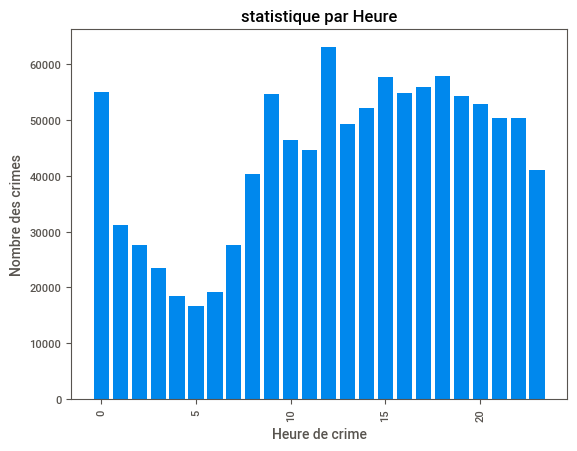

In [10]:
plt.show()
community_area_counts = dataset['Hour'].value_counts()

plt.bar(community_area_counts.index, community_area_counts)
plt.title('statistique par Heure')
plt.xlabel('Heure de crime')
plt.ylabel('Nombre des crimes')
plt.xticks(rotation=90)
plt.show()

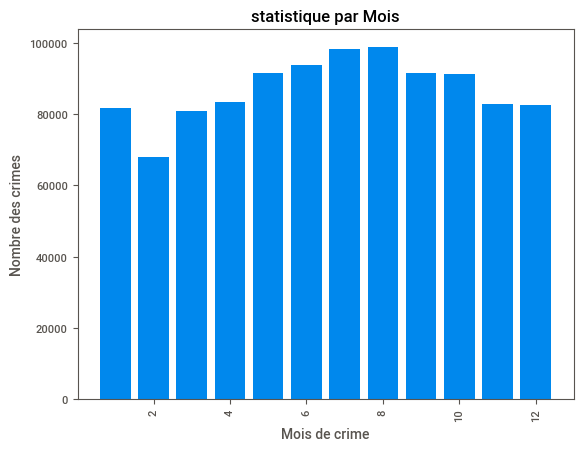

In [11]:
plt.show()
community_area_counts = dataset['Month'].value_counts()

plt.bar(community_area_counts.index, community_area_counts)
plt.title('statistique par Mois')
plt.xlabel('Mois de crime')
plt.ylabel('Nombre des crimes')
plt.xticks(rotation=90)
plt.show()

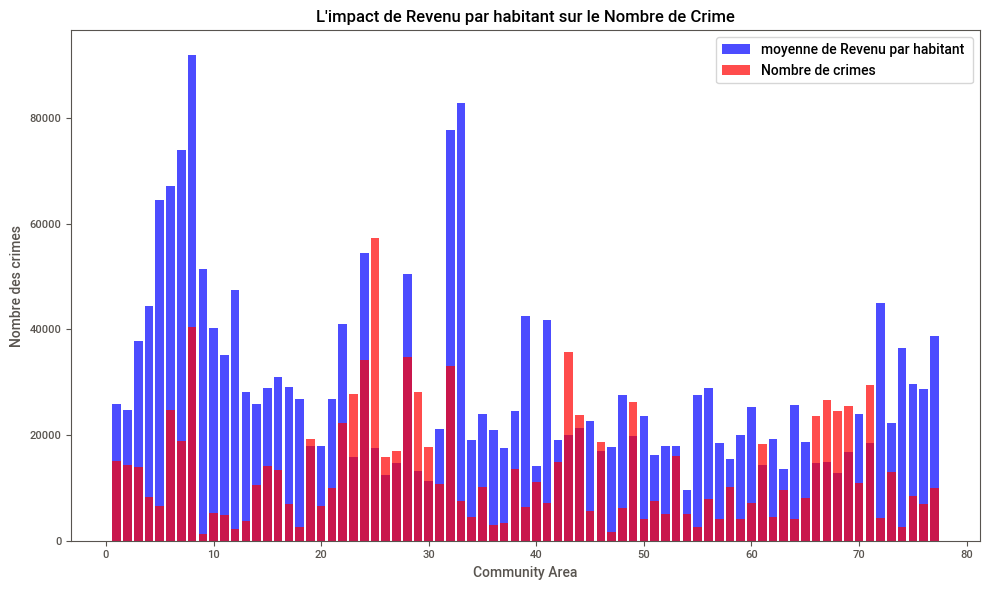

In [12]:
plt.show()
crime_counts = dataset['community_area'].value_counts().sort_index()

# Calculating average per capita income for each community area
average_income = dataset.groupby('community_area')['Per_Capita_Income'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_income.index, average_income, color='blue', alpha=0.7, label='moyenne de Revenu par habitant ')
plt.bar(crime_counts.index, crime_counts, color='red', alpha=0.7, label='Nombre de crimes')
plt.title("L'impact de Revenu par habitant sur le Nombre de Crime")
plt.xlabel('Community Area')
plt.ylabel('Nombre des crimes')
plt.legend()
plt.tight_layout()
plt.show()

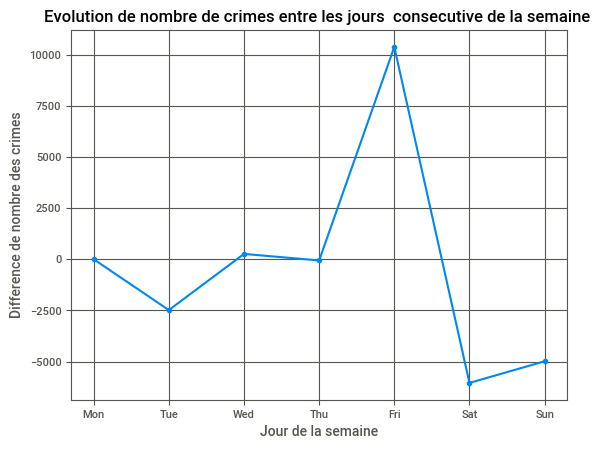

In [13]:
dataset['day_of_week'] = dataset['Date'].dt.dayofweek
day_counts = dataset['day_of_week'].value_counts().sort_index()
day_diff = day_counts.diff().fillna(0)

# Plot the difference using a line plot
plt.plot(day_diff.index, day_diff, marker='o', linestyle='-')
plt.title('Evolution de nombre de crimes entre les jours  consecutive de la semaine ')
plt.xlabel('Jour de la semaine')
plt.ylabel('Difference de nombre des crimes')
plt.xticks(day_diff.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [14]:
dataset.drop(['Date'], axis=1, inplace=True)

In [15]:
dataset["location_description"].value_counts()
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map the numerical values in the 'day_of_the_week' column to day names
dataset['week_days'] = dataset['day_of_week'].map(day_map)


In [16]:
bins = [0, 5, 16, 20]  # [night, day, evening, night]

# Define labels for each category
labels = ['night', 'day', 'evening']

# Create a new column with categorized values
dataset['time_of_day'] = pd.cut(dataset['Hour'], bins=bins, labels=labels, right=False)
dataset['time_of_day'].fillna("night", inplace=True)

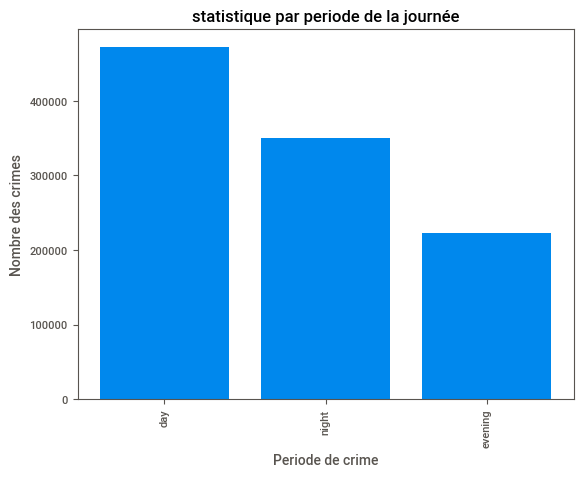

In [17]:
plt.show()
community_area_counts = dataset['time_of_day'].value_counts()

plt.bar(community_area_counts.index, community_area_counts)
plt.title('statistique par periode de la journée')
plt.xlabel('Periode de crime')
plt.ylabel('Nombre des crimes')
plt.xticks(rotation=90)
plt.show()

In [18]:
dataset = dataset.drop("Arrest",axis=1)
dataset = dataset.drop("Day",axis=1)
dataset = dataset.drop("Month",axis=1)
dataset = dataset.drop("Hour",axis=1)
dataset = dataset.drop("day_of_week",axis=1)
dataset

,community_area,primary_type,Domestic,location_description,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income,week_days,time_of_day
0,63,OFFENSE AND KIDNAPPING,True,Residential Areas,65.3,12.1,18.5,13.7,22.4,39.0,13605.0,Thursday,night
1,63,OFFENSE AND KIDNAPPING,True,Residential Areas,65.3,12.1,18.5,13.7,22.4,39.0,13605.0,Sunday,night
2,30,OFFENSE AND KIDNAPPING,True,Residential Areas,70.6,13.6,30.3,8.7,28.8,35.3,11345.0,Thursday,night
3,46,PUBLIC ORDER CRIMES,False,Residential Areas,54.9,3.4,28.9,20.3,11.6,41.1,16996.0,Tuesday,night
4,16,THEFT,False,Residential Areas,32.3,3.5,10.3,5.8,10.3,30.2,31043.0,Friday,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045246,68,PUBLIC ORDER CRIMES,False,NaN,70.5,4.0,42.4,34.1,16.1,41.5,12777.0,Wednesday,day
1045247,49,PUBLIC ORDER CRIMES,False,NaN,52.6,2.2,24.0,24.3,9.6,41.8,19755.0,Sunday,day
1045248,48,PUBLIC ORDER CRIMES,False,NaN,38.4,2.0,13.7,12.3,8.1,37.8,27488.0,Sunday,day
1045249,44,THEFT,True,Residential Areas,47.9,2.9,26.1,19.0,8.0,37.9,21416.0,Friday,day


In [19]:
dataset.isnull().sum()

community_area                       0
primary_type                         0
Domestic                             0
location_description              3845
Hardship_Score                       0
Crowded_Housing_Per                  0
Below_Poverty_Household_Income       0
Unemployment_Rate                    0
No_High_School_Diploma               0
Under_18_over_64                     0
Per_Capita_Income                    0
week_days                            0
time_of_day                          0
dtype: int64

In [20]:
dataset = dataset.dropna()

## Modelisation

In [21]:
numerical_data = dataset[["Domestic","Hardship_Score","Crowded_Housing_Per","Below_Poverty_Household_Income","Unemployment_Rate","No_High_School_Diploma","Under_18_over_64","Per_Capita_Income",]]
categorical_data = dataset[['primary_type',"location_description","week_days","time_of_day"]]

In [22]:
numerical_columns = numerical_data.columns
categorical_columns = categorical_data.columns

# Standardize numerical variables
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# One-hot encoding for categorical variables
encoded_categorical_data = pd.get_dummies(categorical_data)

# Combine column names after preprocessing
final_columns = list(scaled_numerical_data.columns) + list(encoded_categorical_data.columns)

# Concatenate preprocessed numerical and categorical data
final_data = pd.concat([scaled_numerical_data, encoded_categorical_data], axis=1)

In [23]:
final_data = final_data.dropna()

In [24]:
def calculate_WSS(points, kmax, kmin):
    points_array = points.values.astype(np.float32)  # Convert DataFrame to NumPy array
    
    sse = []
    for k in range(kmin, kmax + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(points_array)
        
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points_array)
        
        # Initialize an array to store the squared distances for each cluster
        cluster_sse = np.zeros(k)
        for i in range(len(points)):
            cluster_sse[pred_clusters[i]] += np.sum((points_array[i] - centroids[pred_clusters[i]]) ** 2)
        
        sse.append(cluster_sse)
        print("Iteration avec " + str(k) + " clusters")
        
    return sse

In [25]:
sse = calculate_WSS(final_data, kmax=20, kmin=1)

C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 1 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 2 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 3 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 4 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 5 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 6 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 7 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 8 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 9 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 10 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 11 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 12 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 13 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 14 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 15 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 16 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 17 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 18 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 19 clusters


C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration avec 20 clusters


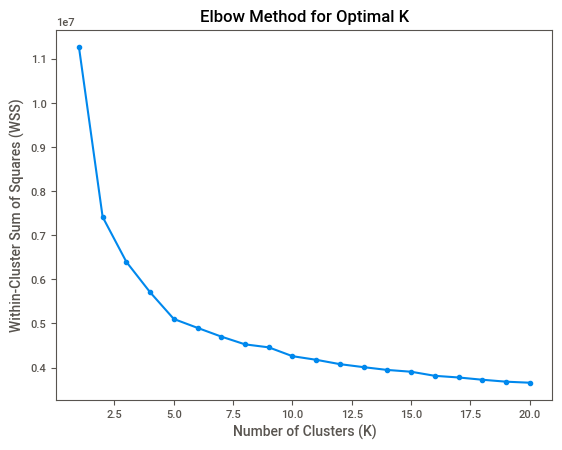

In [26]:
wss = [sum(cluster_sse) for cluster_sse in sse]

# Plot the WSS against the number of clusters (K)
plt.plot(range(1, len(wss) + 1), wss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(final_data)

C:\Users\K-1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
column_names = list(final_data.columns)
centroids = kmeans.cluster_centers_

# Identify important features
feature_importance = np.abs(centroids[0] - centroids[1])

# Rank features
sorted_indices = np.argsort(feature_importance)[::-1]

# Map indices to real column names
important_features_names = [column_names[idx] for idx in sorted_indices]

# Print mapped feature importance
print("Mapped Feature Importance:")
for name, importance in zip(important_features_names, feature_importance[sorted_indices]):
    print(f"{name}: {importance}")

In [ ]:
final_data['clusters'] = kmeans.fit_predict(final_data)
final_data.value_counts("clusters").plot(kind='bar')

In [ ]:
dataset = final_data.copy()
dataset['clusters'] = kmeans.fit_predict(final_data)
# Assuming 'final_data' is your DataFrame
 
# List of original values/columns for 'primary_type'
primary_type_cols = [col for col in dataset.columns if col.startswith('primary_type_')]
# Convert back to categorical column
dataset['primary_type'] = dataset[primary_type_cols].idxmax(axis=1)
dataset['primary_type'] = dataset['primary_type'].apply(lambda x: x.split('primary_type_')[1])
 
# List of original values/columns for 'location_description'
location_description_cols = [col for col in dataset.columns if col.startswith('location_description_')]
# Convert back to categorical column
dataset['location_description'] = dataset[location_description_cols].idxmax(axis=1)
dataset['location_description'] = dataset['location_description'].apply(lambda x: x.split('location_description_')[1])

week_days_cols = [col for col in dataset.columns if col.startswith('week_days_')]
# Convert back to categorical column
dataset['week_days'] = dataset[week_days_cols].idxmax(axis=1)
dataset['week_days'] = dataset['week_days'].apply(lambda x: x.split('week_days_')[1])



time_of_day_cols = [col for col in dataset.columns if col.startswith('time_of_day_')]
# Convert back to categorical column
dataset['time_of_day'] = dataset[time_of_day_cols].idxmax(axis=1)
dataset['time_of_day'] = dataset['time_of_day'].apply(lambda x: x.split('time_of_day_')[1])
 
# Drop the one-hot encoded columns from the DataFrame
dataset.drop(columns=primary_type_cols + location_description_cols + time_of_day_cols + week_days_cols , inplace=True)
inverse_scaled_numerical_data = pd.DataFrame(scaler.inverse_transform(scaled_numerical_data), columns=numerical_columns)


# Concatenate inverse transformed numerical and categorical data
final_inverse_data = pd.concat([inverse_scaled_numerical_data], axis=1)

categorical_data = dataset[["location_description","primary_type","clusters","week_days","time_of_day"]]
dataset = pd.concat([inverse_scaled_numerical_data,categorical_data], axis=1)

## Interpretation des Resultats

In [ ]:
# Extract the two most important features
feature1 = 'Per_Capita_Income'  # Replace 'Feature1' with the name of the first important feature
feature2 = 'Hardship_Score'  # Replace 'Feature2' with the name of the second important feature

# Assign each data point to its respective cluster
clusters = dataset['clusters']

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(dataset[feature1], dataset[feature2], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-means Clustering Results')


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Unemployment_Rate', data=dataset)
plt.title('Box Plot of Unemployment_Rate Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Unemployment_Rate')
plt.show()

In [ ]:
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Hardship_Score', data=dataset)
plt.title('Box Plot of Hardship_Score Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Hardship_Score')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Below_Poverty_Household_Income', data=dataset)
plt.title('Box Plot of Below_Poverty_Household_Income Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Below_Poverty_Household_Income')
plt.show()

In [ ]:
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='No_High_School_Diploma', data=dataset)
plt.title('Box Plot of No_High_School_Diploma Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('No_High_School_Diploma')
plt.show()

In [ ]:
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Per_Capita_Income', data=dataset)
plt.title('Box Plot de Per_Capita_Income Basée on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Per_Capita_Income')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

group_counts = dataset.groupby('clusters')["primary_type"].value_counts()
unique_values = dataset['clusters'].unique()

# Create a single figure outside the loop
fig, axs = plt.subplots(nrows=len(unique_values), figsize=(10, 5 * len(unique_values)))

for idx, value in enumerate(unique_values):
    counts = group_counts[value]
    ax = axs[idx] if len(unique_values) > 1 else axs  # Handle case with only one unique value
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Count of Group for Value {value}')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
result = dataset.groupby(["clusters"]).agg({
    "Per_Capita_Income": "mean", 
    "Under_18_over_64": "mean",
    "Hardship_Score": "mean", 
    "No_High_School_Diploma": "mean",
    "clusters": "size"  # Count occurrences of each cluster
})
result

In [ ]:
# Plot count of time of the day per cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', hue='clusters', data=dataset)
plt.title('Count of Time of the Day per Cluster')
plt.xlabel('Time of the Day')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='week_days', hue='clusters', data=dataset)
plt.title('Count of Days of the Week per Cluster')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

In [ ]:
dataset

In [ ]:
dataset.to_csv("./dataset_kmeans")